In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [7]:
Batch_size = 32
Image_size = 256
Channels = 3
Epochs = 20

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "POTATO DATABASE",
    shuffle = True,
    image_size = (Image_size, Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 2 0 0 1 0 1 1 1 0 1 0 1 2 2 1 0 1 0 0 0 0 0 0 1]


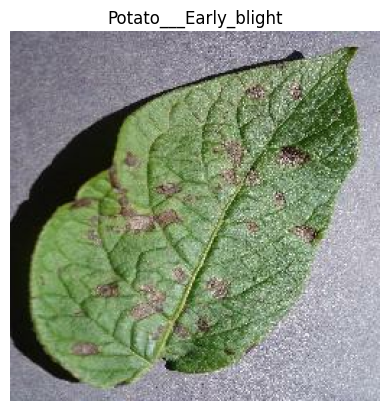

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")


In [13]:
train_ds = dataset.take(54)
remaining_ds = dataset.skip(54)    ## Total = 68, train = 54, val = 6, test = 8
val_ds = remaining_ds.take(6)
test_ds = remaining_ds.skip(6)

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0/255)
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [17]:
input_size = (Batch_size,Image_size,Image_size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_size)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [20]:
model.fit(
    train_ds,
    epochs = Epochs,
    batch_size = Batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/20


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4591 - loss: 0.9394 - val_accuracy: 0.6146 - val_loss: 0.7770
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6417 - loss: 0.6815 - val_accuracy: 0.7135 - val_loss: 0.9870
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 857ms/step - accuracy: 0.7368 - loss: 0.6280 - val_accuracy: 0.7708 - val_loss: 0.5541
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 890ms/step - accuracy: 0.8664 - loss: 0.3400 - val_accuracy: 0.8802 - val_loss: 0.3119
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 962ms/step - accuracy: 0.8858 - loss: 0.2849 - val_accuracy: 0.9062 - val_loss: 0.2476
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 842ms/step - accuracy: 0.9294 - loss: 0.1758 - val_accuracy: 0.9219 - val_loss: 0.1984
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 841ms/step - accuracy: 0.9398 - loss: 0.1565 - val_accuracy: 0.9271 - val_loss: 0.1941
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 806ms/step - accuracy: 0.8722 - loss: 0.3146 - val_accuracy: 0.9219 - v

In [21]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.9494 - loss: 0.1035


[0.09071723371744156, 0.9655172228813171]

actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
predicted label :  Potato___Early_blight


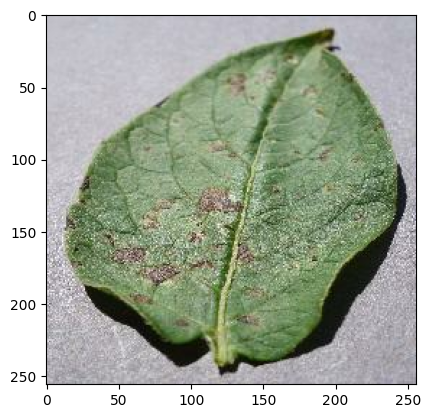

In [22]:
for image_batch, label_batch in test_ds.take(1) :

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    plt.imshow(first_image)
    print("actual label : ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label : ", class_names[np.argmax(batch_prediction[0])])

In [23]:
import os

model_version = 1
save_dir = "models" 

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, f"{model_version}.keras")
model.save(model_path)

print(f"Model saved to {model_path}")


Model saved to models\1.keras
